<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Import Dependencies</div>

In [2]:
import gymnasium as gym
import numpy as np
import pickle, os
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
from time import sleep
from matplotlib import animation

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Initialize and Validate the Environment</div>

The provided code initializes an environment for the 'Taxi-v3' problem from the OpenAI Gym library. The environment is configured to render its states as RGB arrays, which can be useful for visualizing the agent's interactions with the environment. The initialized environment is stored in the variable env for further use in the code.

In [3]:
#Initialize the environment
env = gym.make('Taxi-v3', render_mode='rgb_array').env #Using the already pre-existence library Taxi-v3 and storing in the variable env
env

<OrderEnforcing<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>

In [20]:
state = env.reset() #reset the environment and returns an initial observation so we can have better training of the agent, 
#i.e we are doing it from the scratch
state

(491, {'prob': 1.0, 'action_mask': array([0, 1, 0, 1, 0, 0], dtype=int8)})

When the state is run, the value keeps changing

In [21]:
#There are a total of 500 observations
env.observation_space.n

500

We now generate the visual representation of the environment

In [22]:
env.render()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]

In [23]:
state,_=env.reset()

1. Prints information about the state and action spaces of the environment.
2. Samples a random action using an action mask, which may restrict the set of possible actions based on the current state.
3. Prints the state, action, action mask, and reward obtained from the environment after taking the sampled action.
4. Renders and displays a visual representation (frame) of the environment using plt.imshow().

In summary, the code provides information about the state and action spaces, demonstrates how to sample a random action with an action mask, prints relevant information, and visually displays a frame of the environment.

State space: Discrete(500)
Action space: Discrete(6)
State: 167
Action: 3
Action mask: [1 1 1 1 0 0]
Reward: -1


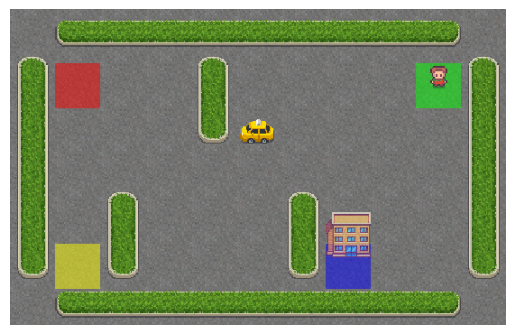

In [24]:
#Prints information about state and action spaces
print("State space: {}".format(env.observation_space))
print("Action space: {}".format(env.action_space))

# Sample random action with an action mask
action = env.action_space.sample(env.action_mask(state))
next_state, reward, done, _, _ = env.step(action)

# Print output
print("State: {}".format(state))
print("Action: {}".format(action))
print("Action mask: {}".format(env.action_mask(state)))
print("Reward: {}".format(reward))

# Rendering and plotting an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Possible Actions</div>

Possible Actions
down(0), up(1), right(2), left(3), pickup(4) and drop-off(5)

In [4]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [26]:
#Number of actions as defined above is 6
n_actions

6

In [27]:
#Again, number of states is 500 as earlier described
n_states

500

In [28]:
env.env.s = 150

In [29]:
env.render()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]

1. Print information about the state and action spaces of the environment.
2. Sample a random action using an action mask (if provided by the environment).
3. Execute the action in the environment and obtain the next state, reward, and other information.
4. Print the current state, sampled action, action mask, and obtained reward.
5. Render and plot an environment frame for visualization.

In summary, this code is inspecting and interacting with the environment, providing information about its state and action spaces, and visualizing a frame from the environment.

State space: Discrete(500)
Action space: Discrete(6)
State: 167
Action: 1
Action mask: [1 1 1 1 0 0]
Reward: -1


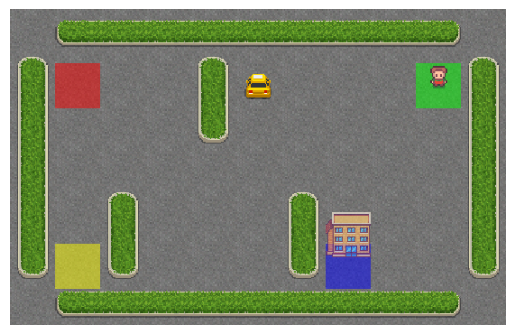

In [30]:
print("State space: {}".format(env.observation_space))
print("Action space: {}".format(env.action_space))

# Sample random action
action = env.action_space.sample(env.action_mask(state))
next_state, reward, done, _, _ = env.step(action)

# Print output
print("State: {}".format(state))
print("Action: {}".format(action))
print("Action mask: {}".format(env.action_mask(state)))
print("Reward: {}".format(reward))

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [31]:
env.step(1)#probability of reaching the state
#probability 1 means the passenger is in the cab
#probability 0 means the passenger is not in the cab

(47,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 0, 1, 0, 0, 0], dtype=int8)})

How good does behaving completely random do?

Presetting the variables

In [32]:
state = env.reset() #reset the environment
counter = 0 #counting how many directions the taxi has made
g = 0 #know whether the agent is successful in dropping off the passenger
reward = None #If it is successful in dropping the passenger at the target location, reward will be true, otherwise 
#if the agent and passenger are still on motion or agent is not successful, it will be False

iteration of the loop, the following actions are performed:

1. Take a step in the environment by calling the env.step(action) method, where action is presumably a pre-determined action or a sampled action from the environment's action space.
2. Obtain the observation (obs), reward (reward), termination status (terminated), truncation status (truncated), and additional information (info) from the environment.
3. Increment a counter variable (counter) to keep track of the number of steps taken in the environment.
4. Update the total reward variable (g) by adding the current reward.

The loop continues iterating until the condition reward != 20 becomes false, indicating that a reward of 20 has been achieved in the environment. The specific details of the environment, action sampling, and reward conditions would depend on the surrounding code that is not provided here.

In [90]:
while reward !=20:
    #state, reward, done, info = env.step(env.action_space.sample())
    obs, reward, terminated, truncated , info = env.step(action)
    #state, reward, done, info = env.step(action)
    counter += 1
    g += reward

In [38]:
print('solved in {} steps with a total reward of {}'.format(counter,g))

solved in 9465038 steps with a total reward of -9465038


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Q-Learning</div>

This code defines a function named run_animation that takes an experience_buffer as input and runs an animation based on the contents of the buffer. The key actions performed by this function are as follows:

1. Display Frames: Iterate through each experience in the experience_buffer.

   + Use clear_output to clear the previous output in the console.
   + Use plt.imshow to display the frame stored in the current experience.
   + Hide axis using plt.axis('off').
   + Use plt.show() to display the current frame.
2. Print Console Output: Print relevant information from the current experience to the console.

   + Print the episode and epoch numbers.
   + Print the current state, action, and reward.
3. Pause Animation: Use sleep to introduce a time delay (time_lag) between frames, creating a visual animation effect.

In summary, this function is designed to visualize an animation based on the frames stored in the experience_buffer and display relevant information for each frame in the console. The time delay between frames provides a smoother animation experience.

In [85]:
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        # Print console output
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")
        # Pauze animation
        sleep(time_lag)

This code defines a function named store_episode_as_gif that creates a gif animation from a list of frames stored in an experience_buffer. The key actions performed by this function are as follows:

1. Set Animation Parameters: Define the frames per second (fps), dots per inch (dpi), and interval between frames (interval).
2. Retrieve Frames:Extract frames from the experience_buffer by collecting the 'frame' information for each experience.
3. Fix Frame Size:Create a figure with a fixed size based on the dimensions of the first frame in the list.
Hide the axis.
4. Generate Animation:Define an animate function to update the displayed image for each frame.
Use animation.FuncAnimation to create the animation, setting the number of frames and the interval.\n
5. Save as GIF:Save the generated animation as a GIF file using the imagemagick writer with the specified file path and name.

In summary, this function takes a list of frames from an experience_buffer, creates an animation, and saves it as a GIF file with the provided path and filename. The resulting GIF visually represents the sequence of frames stored in the experience_buffer

In [86]:
def store_episode_as_gif(experience_buffer, path='./', filename='animation.gif'):
    """Store episode as gif animation"""
    fps = 5   # Set framew per seconds
    dpi = 300  # Set dots per inch
    interval = 50  # Interval between frames (in ms)

    # Retrieve frames from experience buffer
    frames = []
    for experience in experience_buffer:
        frames.append(experience['frame'])

    # Fix frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    # Generate animation
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=interval)

    # Save output as gif
    anim.save(path + filename, writer='imagemagick', fps=fps)

This code simulates the behavior of an agent in the environment by taking random actions. Here's a summary of what the code does:

1. Initialization:

Initialize variables for the epoch, number of failed drop-offs, an experience buffer, and cumulative reward.
Set done to False.
2. Environment Reset:

Reset the environment (env) and obtain the initial state (state).
3. Simulation Loop:

    Continue the loop until the termination condition (done) becomes True.
    Within each iteration:
        Sample a random action from the environment's action space.
        Execute the action in the environment, obtaining the next state, reward, and other information.
        Update the cumulative reward.
        Store the experience information, including the rendered frame, episode number (1 in this case), epoch, state, action,            and cumulative reward in the experience buffer.
        Check if the reward is equal to -10, indicating a failed drop-off, and increment the count of failed drop-offs if true.
        Increment the epoch counter.
4. Run Animation and Display Console Output: 
        After the simulation loop, run the animation using the run_animation function with the collected experience buffer.
        Print the total number of epochs (epoch) and the count of failed drop-offs.

In summary, this code performs a simulation of an agent in the environment, where the agent takes random actions. The resulting animation and console output provide insights into the agent's behavior and the number of failed drop-offs during the simulation.

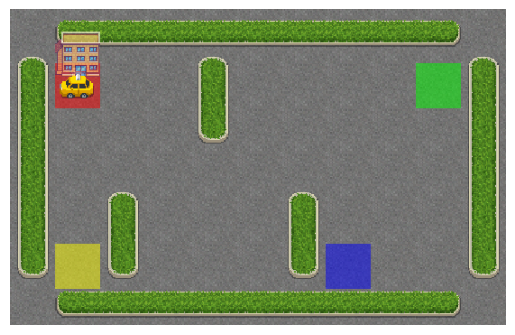

Episode: 1/1
Epoch: 4004/4004
State: 0
Action: 5
Reward: -15891
# epochs: 4005
# failed drop-offs: 1323


In [87]:
"""Simulation with random agent"""
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False

state, _ = env.reset()

while not done:
    # Sample random action
    "Action selection without action mask"
    action = env.action_space.sample()

    "Action selection with action mask"
    #action = env.action_space.sample(env.action_mask(state))

    state, reward, done, _, _ = env.step(action)
    cum_reward += reward

    # Store experience in dictionary
    experience_buffer.append({
        "frame": env.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)

print("# epochs: {}".format(epoch))
print("# failed drop-offs: {}".format(num_failed_dropoffs))

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Train the Agent</div>

This code represents the training process of an agent using the Q-learning algorithm to learn a policy for interacting with the environment. Here's a summary of what the code does:

1. Q-table Initialization:
        Initialize a Q-table with zeros, where the rows correspond to states, and columns correspond to actions in the                 environment.
2. Hyperparameters:
      Set hyperparameters such as the learning rate (alpha), discount factor (gamma), exploration rate (epsilon), and the total       number of training episodes (num_episodes).
3. Training Loop: 
    Iterate over the specified number of episodes.
    Within each episode:
        Reset the environment and obtain the initial state.
        Initialize variables for the current epoch, the number of failed drop-offs, and cumulative reward.
        Set done to False.
        While the episode is not done:
            Use an epsilon-greedy policy to select an action:
                With probability epsilon, choose a random action for exploration.
                Otherwise, choose the action with the highest Q-value for exploitation.
            Execute the selected action in the environment and observe the next state, reward, and whether the episode is done.
            Update the cumulative reward.
            Update the Q-value for the current state-action pair using the Q-learning update rule.
            Check if the reward is equal to -10, indicating a failed drop-off, and increment the count of failed drop-offs if                  true.
            Move to the next state and increment the epoch counter.
        Store the total epoch count and cumulative reward for the current episode.
4. Visualization: After every 100 episodes, clear the console and print the current episode number.
Plot the convergence of cumulative rewards and the number of epochs per episode.

In summary, this code trains the agent by allowing it to explore and exploit the environment, updating its Q-values based on the rewards received, and visualizing the learning progress through plots of cumulative rewards and epochs per episode.

Episode #: 10000


===Training completed.===



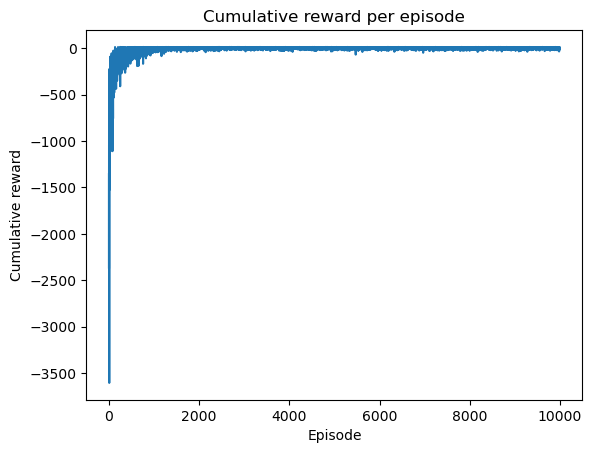

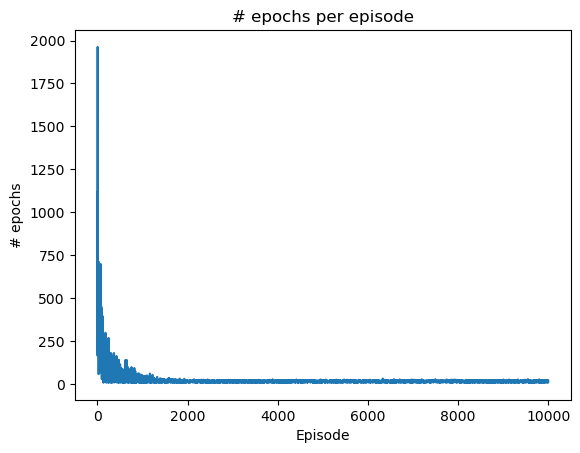

In [88]:
"""Training the agent"""
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 1.0  # Discount rate
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of episodes

# Output for plots
cum_rewards = np.zeros([num_episodes])
total_epochs = np.zeros([num_episodes])

for episode in range(1, num_episodes+1):
    # Reset environment
    state, info = env.reset()
    epoch = 0 
    num_failed_dropoffs = 0
    done = False
    cum_reward = 0

    while not done:
        
        if random.uniform(0, 1) < epsilon:
            "Basic exploration [~0.47m]"
            action = env.action_space.sample() # Sample random action (exploration)
            
            "Exploration with action mask [~1.52m]"
          # action = env.action_space.sample(env.action_mask(state)) "Exploration with action mask"
        else:      
            "Exploitation with action mask [~1m52s]"
           # action_mask = np.where(info["action_mask"]==1,0,1) # invert
           # masked_q_values = np.ma.array(q_table[state], mask=action_mask, dtype=np.float32)
           # action = np.ma.argmax(masked_q_values, axis=0)

            "Exploitation with random tie breaker [~1m19s]"
          #  action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
            
            "Basic exploitation [~47s]"
            action = np.argmax(q_table[state]) # Select best known action (exploitation)
 
        next_state, reward, done, _ , info = env.step(action) 

        cum_reward += reward
        
        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
        
        q_table[state, action] = new_q_value
        
        if reward == -10:
            num_failed_dropoffs += 1

        state = next_state
        epoch += 1
        
        total_epochs[episode-1] = epoch
        cum_rewards[episode-1] = cum_reward

    if episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode #: {episode}")

print("\n")
print("===Training completed.===\n")

# Plot reward convergence
plt.title("Cumulative reward per episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(cum_rewards)
plt.show()

# Plot epoch convergence
plt.title("# epochs per episode")
plt.xlabel("Episode")
plt.ylabel("# epochs")
plt.plot(total_epochs)
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#2a8000;overflow:hidden;font-weight:500">Test the Agent</div>

This code evaluates the performance of the trained policy by running the agent in the environment for a specified number of episodes. Here's a summary of what the code does:

1. Evaluation Loop:

Iterate over the specified number of evaluation episodes (num_episodes).
Within each episode:
Reset the environment and obtain the initial state.
Initialize variables for the current epoch, the number of failed drop-offs, cumulative reward, and set done to False.
While the episode is not done:
Use the learned policy (highest Q-value) to select an action.
Execute the selected action in the environment and observe the next state, reward, and whether the episode is done.
Update the cumulative reward.
Check if the reward is equal to -10, indicating a failed drop-off, and increment the count of failed drop-offs if true.
Store the rendered frame, episode, epoch, state, action, and cumulative reward in the experience buffer.
Move to the next state and increment the epoch counter.
Update the total number of epochs and failed drop-offs.
2. Visualization:

If specified (store_gif is True), store the experience buffer as a GIF animation.
Run the animation and print the output, showing the sequence of frames, actions, and rewards during the evaluation.
3. Print Final Results:
Print the mean number of epochs per episode and the mean number of failed drop-offs per episode over all evaluation episodes.

In summary, this code assesses how well the trained agent performs in the environment after training, providing insights into the learned policy's effectiveness. It visualizes the agent's behavior and prints statistics such as mean epochs and failed drop-offs for evaluation episodes.

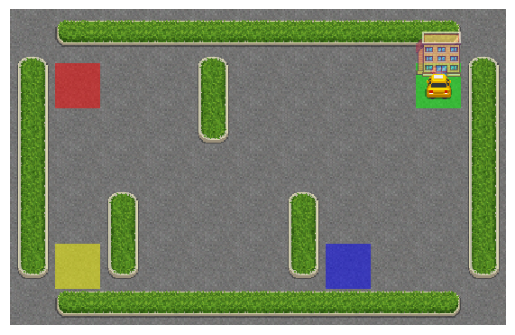

Episode: 1/1
Epoch: 13/13
State: 85
Action: 5
Reward: 8


Test results after 1 episodes:
Mean # epochs per episode: 14.0
Mean # failed drop-offs per episode: 0.0


In [89]:
"""Test policy performance after training"""

num_epochs = 0
total_failed_deliveries = 0
num_episodes = 1
experience_buffer = []
store_gif = True

for episode in range(1, num_episodes+1):
    # Initialize experience buffer

    my_env = env.reset()
    state = my_env[0]
    epoch = 1 
    num_failed_deliveries =0
    cum_reward = 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _, _ = env.step(action)
        cum_reward += reward

        if reward == -10:
            num_failed_deliveries += 1

        # Store rendered frame in animation dictionary
        experience_buffer.append({
            'frame': env.render(),
            'episode': episode,
            'epoch': epoch,
            'state': state,
            'action': action,
            'reward': cum_reward
            }
        )

        epoch += 1

    total_failed_deliveries += num_failed_deliveries
    num_epochs += epoch

    if store_gif:
        store_episode_as_gif(experience_buffer)

# Run animation and print output
run_animation(experience_buffer)

# Print final results
print("\n") 
print(f"Test results after {num_episodes} episodes:")
print(f"Mean # epochs per episode: {num_epochs / num_episodes}")
print(f"Mean # failed drop-offs per episode: {total_failed_deliveries / num_episodes}")